## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [1]:
import sys,json
import glob, os
import pandas as pd

sys.path.append("/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL/derivatives/pilot_project_MAMSL_analyses/code/")


from movement_analyses import Movement_analyses

%matplotlib inline
%load_ext autoreload
%autoreload 2

## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. main directories </font >

In [2]:
# Load config file ------------------------------------------------------------
with open('../config/config_MAMSL.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified

config["list_subjects"]={"sub-008":{"sess01":"MA"}}#,"sub-009":{"sess01":"MA"},"sub-010":{"sess01":"MA"},"sub-011":{"sess01":"MA"},"sub-012":{"sess01":"MA"}}
config["subjects_acq"]={"sub-008":{"sess01":["RNDpre","MA","RNDpost"]}}#,"sub-009":{"sess01":["RNDpre","MA","RNDpost"]},"sub-010":{"sess01":["RNDpre","MA","RNDpost"]},"sub-011":{"sess01":["RNDpre","MA","RNDpost"]},"sub-012":{"sess01":["RNDpre","MA","RNDpost"]}}

mvmt_ana=Movement_analyses(config) # initialize the function

calib_table={};movement_table={};trial_table={}
calib_table,movement_table,trial_table=mvmt_ana.readData() # read data and transform into tables


RNDpre
MA
RNDpost


In [ ]:

movementKin={};trialKin={}
for subject_name in config["list_subjects"]:
    print(subject_name)
    movementKin[subject_name]={}; trialKin[subject_name]={}
    sess="MA"
    movementKin[subject_name][sess]={}; trialKin[subject_name][sess]={}
    for run_name in ["RNDpre","MA","RNDpost"]:#,"RNDpost"]:#,"MA","RNDpost"]:
        #movement_table[subject_name][sess][run_name]=mvmt_ana.reachAngles(calib_table[subject_name][sess],movement_table[subject_name][sess][run_name],trial_table[subject_name][sess][run_name])
        #test=mvmt_ana.kinematic(calib_table[subject_name][sess],movement_table[subject_name][sess][run_name],trial_table[subject_name][sess][run_name])
        
        movementKin[subject_name][sess][run_name],trialKin[subject_name][sess][run_name]=mvmt_ana.kinematics(movement_table[subject_name][sess][run_name],trial_table[subject_name][sess][run_name],run_name,kinematics=False)


sub-008


/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL/derivatives/pilot_project_MAMSL_analyses/code/movement_analyses.py:142: RuntimeWarning: invalid value encountered in sqrt
  vel=np.sqrt((np.gradient(movement_table["axis_statesfilt_x"])) + np.gradient(movement_table["axis_statesfilt_y"]))
/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL/derivatives/pilot_project_MAMSL_analyses/code/movement_analyses.py:142: RuntimeWarning: invalid value encountered in sqrt
  vel=np.sqrt((np.gradient(movement_table["axis_statesfilt_x"])) + np.gradient(movement_table["axis_statesfilt_y"]))


### <font color=#4424D6> III. Concatenate the runs </font >

In [55]:
#loop for each subjects --------------------
mean_bySeq_concat={}
for subject_name in config["list_subjects"]:
    mean_bySeq_concat[subject_name]={}
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
          
        mean_bySeq_concat[subject_name][sess]=pd.concat([trialKin[subject_name][sess]["RNDpre"],trialKin[subject_name][sess][config["list_subjects"][subject_name]["sess01"]],trialKin[subject_name][sess]["RNDpost"]])

        # Reset the index
        mean_bySeq_concat[subject_name][sess]= mean_bySeq_concat[subject_name][sess].reset_index(drop=True)


[autoreload of movement_analyses failed: Traceback (most recent call last):
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen import

### <font color=#4424D6> IV. Concatenate subjects </font >

In [56]:
#MSL participants:
#mean_bySeqbyMSL_concat=pd.concat([mean_bySeq_concat["sub-007"]["MSL"], mean_bySeq_concat["sub-013"]["MSL"],mean_bySeq_concat["sub-014"]["MSL"],mean_bySeq_concat["sub-015"]["MSL"]])
#mean_bySeqbyMSL_concat=mean_bySeqbySbj_concat.reset_index(drop=True)

#MA participants:
mean_bySeqbyMA_concat=pd.concat([mean_bySeq_concat["sub-009"]["MA"],mean_bySeq_concat["sub-010"]["MA"],mean_bySeq_concat["sub-011"]["MA"],mean_bySeq_concat["sub-012"]["MA"]])
mean_bySeqbyMA_concat=mean_bySeqbyMA_concat.reset_index(drop=True)


### <font color=#4424D6> IV. Group plots </font >

Text(0.5, 0.98, 'MA 4 participants')

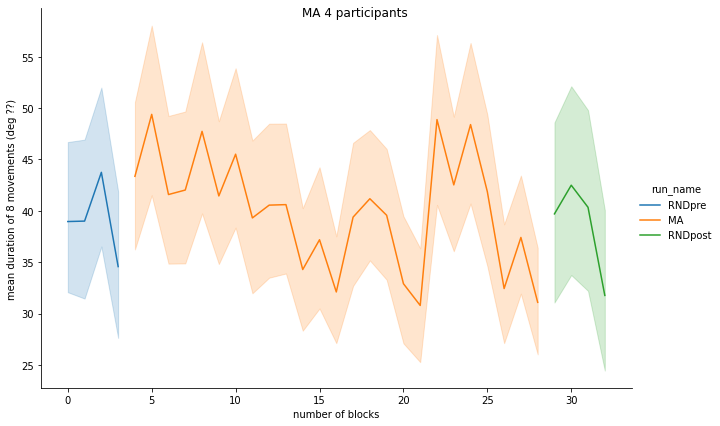

In [57]:
plot=sns.relplot(x="blockRun", y="lineDev",hue="run_name",data=mean_bySeqbyMA_concat,kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (deg ??)')
plot.fig.suptitle('MA 4 participants')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


### <font color=#4424D6> IV. Individual plots </font >

Text(0.5, 0.98, 'sub-008: MSL task')

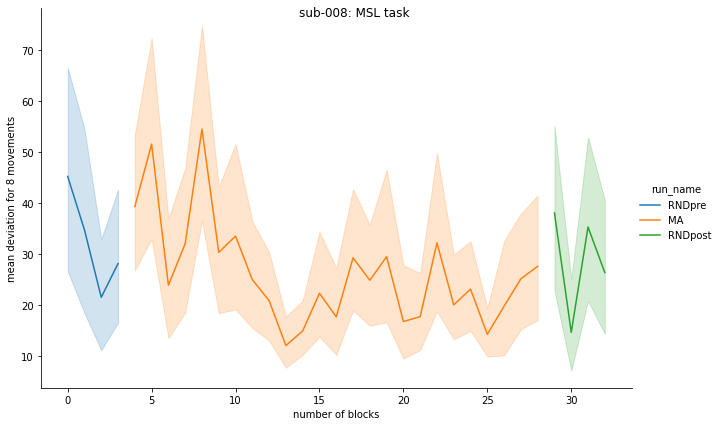

In [52]:
import seaborn as sns
plot=sns.relplot(x="blockRun", y="lineDev",hue="run_name",data=mean_bySeq_concat["sub-008"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean deviation for 8 movements')
plot.fig.suptitle('sub-008: MSL task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


Text(0.5, 0.98, 'sub-008: MSL task')

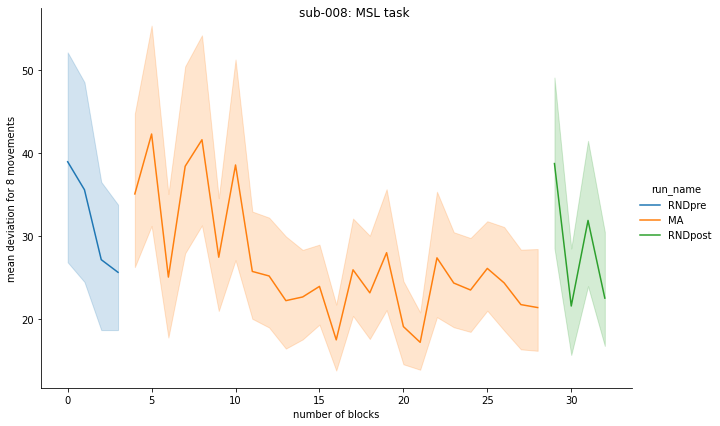

In [32]:
import seaborn as sns
plot=sns.relplot(x="blockRun", y="lineDev",hue="run_name",data=mean_bySeq_concat["sub-008"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean deviation for 8 movements')
plot.fig.suptitle('sub-008: MSL task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


Text(0.5, 0.98, 'sub-008: MSL task')

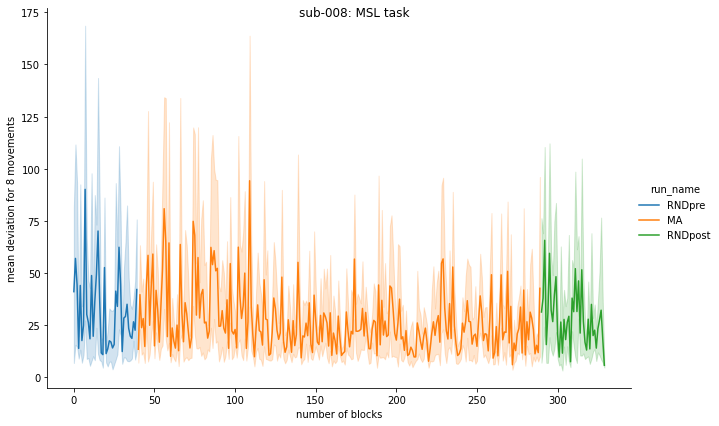

In [38]:
plot=sns.relplot(x="seqRun", y="lineDev",hue="run_name",data=mean_bySeq_concat["sub-008"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean deviation for 8 movements')
plot.fig.suptitle('sub-008: MSL task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


Text(0.5, 0.98, 'sub-009: MSL task')

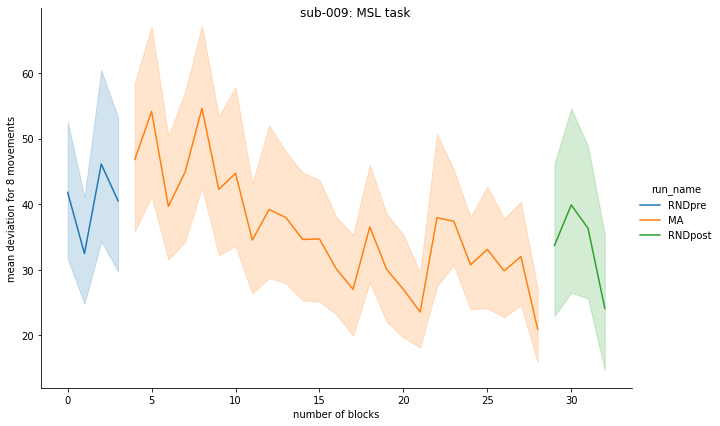

In [39]:
plot=sns.relplot(x="blockRun", y="lineDev",hue="run_name",data=mean_bySeq_concat["sub-009"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean deviation for 8 movements')
plot.fig.suptitle('sub-009: MSL task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


Text(0.5, 0.98, 'sub-010: MSL task')

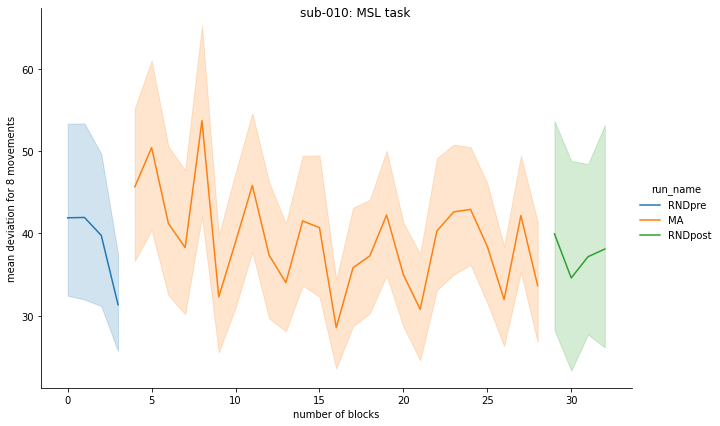

In [40]:
plot=sns.relplot(x="blockRun", y="lineDev",hue="run_name",data=mean_bySeq_concat["sub-010"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean deviation for 8 movements')
plot.fig.suptitle('sub-010: MSL task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


Text(0.5, 0.98, 'sub-011: MSL task')

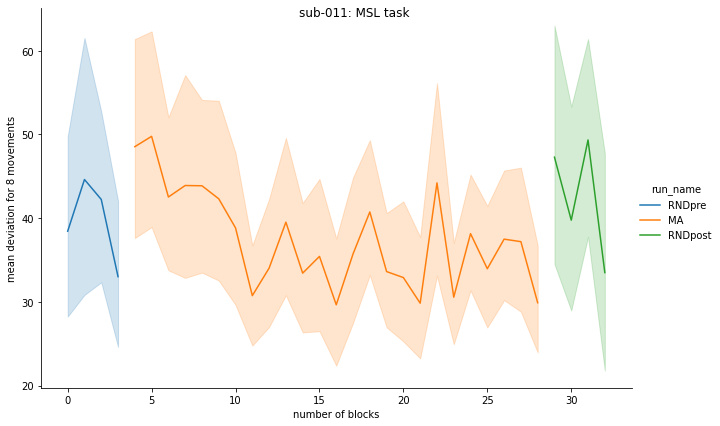

In [42]:
plot=sns.relplot(x="blockRun", y="lineDev",hue="run_name",data=mean_bySeq_concat["sub-011"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean deviation for 8 movements')
plot.fig.suptitle('sub-011: MSL task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


Text(0.5, 0.98, 'sub-012: MSL task')

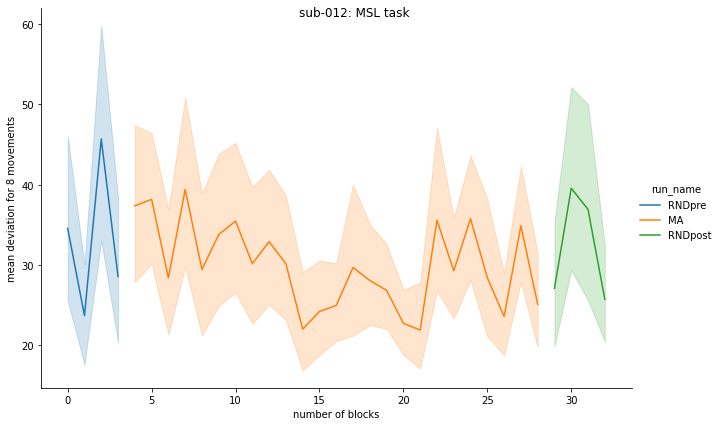

In [43]:
plot=sns.relplot(x="blockRun", y="lineDev",hue="run_name",data=mean_bySeq_concat["sub-012"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean deviation for 8 movements')
plot.fig.suptitle('sub-012: MSL task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


In [333]:
import seaborn as sns
plot=sns.relplot(x="block", y="dirDist",data=trialKin[subject_name]["MA"]["RNDpre"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-008: MA task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


ValueError: Could not interpret value `dirDist` for parameter `y`

Text(0.5, 0.98, 'sub-008: MA task')

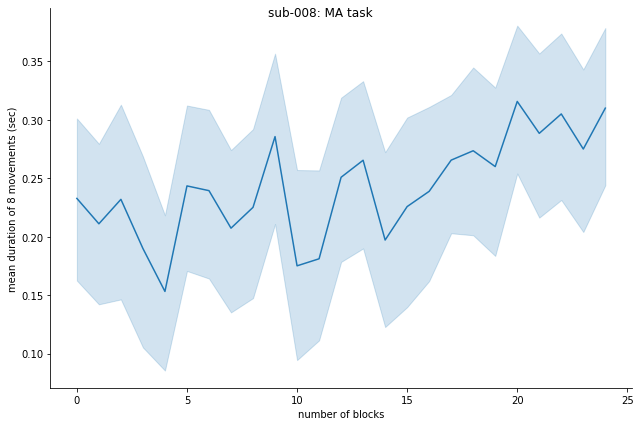

In [177]:
import seaborn as sns
plot=sns.relplot(x="block", y="dirDist",data=trialKin[subject_name]["MA"]["MA"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-008: MA task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


Text(0.5, 0.98, 'sub-008: MA task')

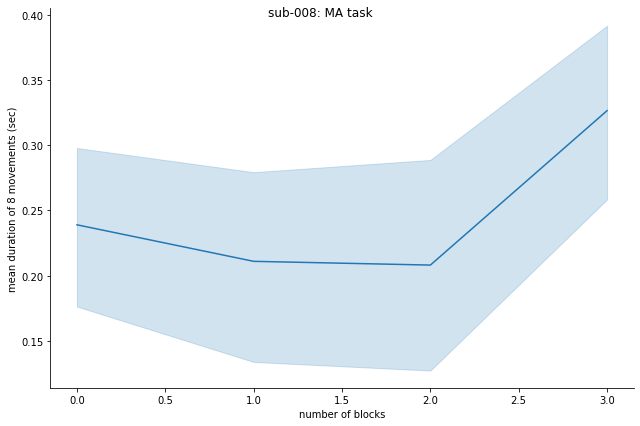

In [181]:
import seaborn as sns
plot=sns.relplot(x="block", y="dirDist",data=trialKin[subject_name]["MA"]["RNDpost"],kind="line", height=6, aspect=1.5)
plot.set_axis_labels('number of blocks', 'mean duration of 8 movements (sec)')
plot.fig.suptitle('sub-008: MA task')
#plt.ylim(1, 5)  # Set the y-axis limits from 0 to 10


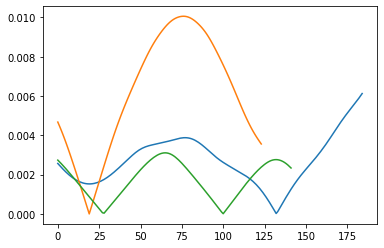

In [349]:
plt.plot(movement_table[subject_name][sess][run_name][movement_table[subject_name][sess][run_name]["trial"]==4]["trial_samples"],movement_table[subject_name][sess][run_name][movement_table[subject_name][sess][run_name]["trial"]==4]["velocity"])
#plt.plot(movement_table[subject_name][sess][run_name][movement_table[subject_name][sess][run_name]["trial"]==20]["trial_samples"],movement_table[subject_name][sess][run_name][movement_table[subject_name][sess][run_name]["trial"]==20]["velocity"])
plt.plot(movement_table[subject_name][sess][run_name][movement_table[subject_name][sess][run_name]["trial"]==200]["trial_samples"],movement_table[subject_name][sess][run_name][movement_table[subject_name][sess][run_name]["trial"]==200]["velocity"])
plt.plot(movement_table[subject_name][sess][run_name][movement_table[subject_name][sess][run_name]["trial"]==100]["trial_samples"],movement_table[subject_name][sess][run_name][movement_table[subject_name][sess][run_name]["trial"]==100]["velocity"])


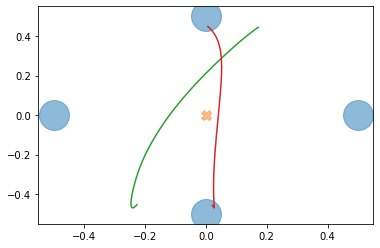

In [326]:
center = [0, 0]
targetdirections = [0, 90, -90, 180]
radius = .50
targetlocation = ([(radius * np.cos(np.pi * dir / 180)) for dir in targetdirections],
                  [(radius * np.sin(np.pi * dir / 180)) for dir in targetdirections])
plt.plot(targetlocation[0], targetlocation[1], marker="o", linestyle="None", markersize=30,alpha=0.5)
plt.plot(center[0], center[1], marker="X", linestyle="None", markersize=10,alpha=0.5)
          
#plt.plot(test[test["trial"]==1000]["line2Reach_X"],test[test["trial"]==1000]["line2Reach_Y"])
plt.plot(test[test["trial"]==1000]["axis_statesfilt_x"],test[test["trial"]==1000]["axis_statesfilt_y"])

#plt.plot(test[test["trial"]==1]["line2Reach_X"],test[test["trial"]==1]["line2Reach_Y"])
plt.plot(test[test["trial"]==4]["axis_statesfilt_x"],test[test["trial"]==4]["axis_statesfilt_y"])



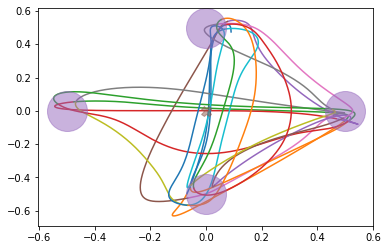

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
for i in range(28,52):
    plt.plot(movement_table[subject_name][sess][run_name]["axis_statesfilt_x"][movement_table[subject_name][sess][run_name]["trial"]==i],movement_table[subject_name][sess][run_name]["axis_statesfilt_y"][movement_table[subject_name][sess][run_name]["trial"]==i])

    
 # plot targets location
center = [0, 0]
targetdirections = [0, 90, -90, 180]
radius = .50
targetlocation = ([(radius * np.cos(np.pi * dir / 180)) for dir in targetdirections],
[(radius * np.sin(np.pi * dir / 180)) for dir in targetdirections])
plt.plot(targetlocation[0], targetlocation[1], marker="o", linestyle="None", markersize=40,alpha=0.5)
plt.plot(center[0], center[1], marker="X", linestyle="None", markersize=10,alpha=0.5)
         


##### targetlocation
0.5*np.cos(np.pi * 532 / 180)-(0.5*np.cos(np.pi * 409 / 180))
#np.sin(np.pi * 535 / 180)-np.sin(np.pi * 428 / 180) 
np.sin(np.pi * dir / 180)

[(0.0, 125.0)]

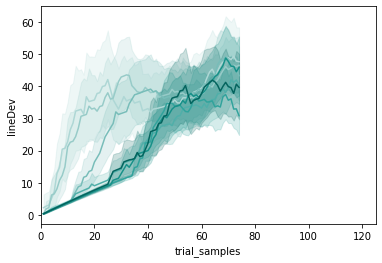

In [345]:
data_RNDpre=test[(test["trial_samples"]>0) & (test["trial_samples"]<75)]
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_RNDpre[data_RNDpre["trial"]<200],color="#aed7d5")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_RNDpre[(data_RNDpre["trial"]>=200) & (data_RNDpre["trial"]<500)],color="#97cbc8")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_RNDpre[(data_RNDpre["trial"]>=500) & (data_RNDpre["trial"]<800)],color="#78bdb9")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_RNDpre[(data_RNDpre["trial"]>=800) & (data_RNDpre["trial"]<1200)],color="#50afa9")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_RNDpre[(data_RNDpre["trial"]>=1200) & (data_RNDpre["trial"]<1500)],color="#31a39c")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_RNDpre[(data_RNDpre["trial"]>=1500) & (data_RNDpre["trial"]<1800)],color="#179189")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_RNDpre[(data_RNDpre["trial"]>=1800)],color="#04645e")
g.set(xlim=(0,125))
#g.set(ylim=(0,6))

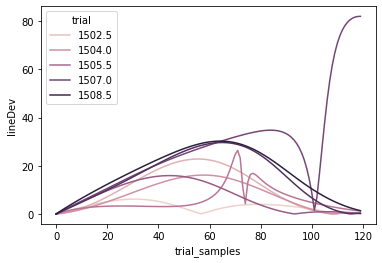

In [315]:
g=sns.lineplot(x="trial_samples",y="lineDev",hue="trial",data=data_RNDpre[(data_RNDpre["trial"]>=1502) & (data_RNDpre["trial"]<1510)],color="#aed7d5")


[(0.0, 18.0)]

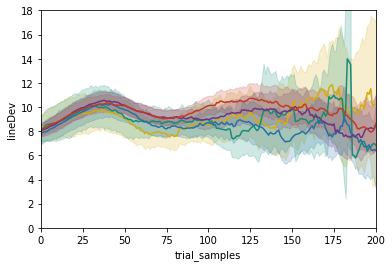

In [156]:
data_MA=movement_table[subject_name][sess]["MA"]
import seaborn as sns
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_MA[data_MA["trial"]<100],color="#d4ac0d")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_MA[(data_MA["trial"]>=100) & (data_MA["trial"]<200)],color="#138d75")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_MA[(data_MA["trial"]>=200) & (data_MA["trial"]<400)],color="#2471a3")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_MA[(data_MA["trial"]>=400) & (data_MA["trial"]<800)],color="#6c3483")
g=sns.lineplot(x="trial_samples",y="lineDev",data=data_MA[(data_MA["trial"]>=800) & (data_MA["trial"]<1200)],color="#c0392b")
g.set(xlim=(0,200))
g.set(ylim=(0,18))

[(0.0, 100.0)]

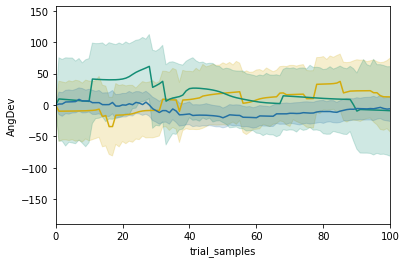

In [245]:
data_RNDpost=movement_table[subject_name][sess]["RNDpost"]
import seaborn as sns
g=sns.lineplot(x="trial_samples",y="AngDev",data=data_RNDpost[data_RNDpost["trial"]<20],color="#d4ac0d")
g=sns.lineplot(x="trial_samples",y="AngDev",data=data_RNDpost[(data_RNDpost["trial"]>=30) & (data_RNDpost["trial"]<40)],color="#138d75")
g=sns.lineplot(x="trial_samples",y="AngDev",data=data_RNDpost[(data_RNDpost["trial"]>=200) & (data_RNDpost["trial"]<400)],color="#2471a3")
g.set(xlim=(0,100))
#g.set(ylim=(0,18))

 ### <font color=#4424D6> II. select the file </font >

## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Analyses

 ### <font color=#4424D6> I. Reaction time </font >

 ### <font color=#4424D6> II. Create a dataframe for all participants</font >

In [158]:
data_MA

[autoreload of movement_analyses failed: Traceback (most recent call last):
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen import

,Unnamed: 0,axis_states_x,axis_states_y,axis_raw_x,axis_raw_y,t_since_start,device_time,sample,trial,phase,axis_statesfilt_x,axis_statesfilt_y,axis_rawfilt_x,axis_rawfilt_y,reachAngs,line2Reach_X,line2Reach_Y,trial_samples,lineDistance,lineDev
0,0,6.949759e-310,6.949759e-310,6.949759e-310,6.949759e-310,6.949759e-310,6.949759e-310,6.949767e-310,6.949759e-310,6.949759e-310,-0.001751,0.000799,-0.524543,-0.178084,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.600000e-01,0.000000e+00,4.230000e+02,0.000000e+00,1.063256e+01,8.436550e+05,1.000000e+00,-1.000000e+00,5.000000e+00,0.013356,0.019423,42.372514,35.862688,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.633333e-01,0.000000e+00,4.240000e+02,0.000000e+00,2.249098e+01,7.046590e+05,2.000000e+00,-1.000000e+00,5.000000e+00,0.028339,0.037870,84.843712,71.657515,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.666667e-01,0.000000e+00,4.250000e+02,0.000000e+00,2.268969e+01,9.016600e+05,3.000000e+00,-1.000000e+00,5.000000e+00,0.043049,0.055997,126.465231,106.955944,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.600000e-01,0.000000e+00,4.230000e+02,0.000000e+00,2.272318e+01,9.366540e+05,5.000000e+00,-1.000000e+00,5.000000e+00,0.057345,0.073668,166.833545,141.514054,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204959,204959,-6.968641e-02,-6.504855e-01,3.550000e+02,6.230000e+02,9.212059e+02,4.186890e+05,3.619520e+05,1.599000e+03,1.000000e+00,-0.070389,-0.606716,354.696105,614.260100,243.675488,520.968,683.248,121.0,165.968,7.649560
204960,204960,-7.317073e-02,-6.893204e-01,3.540000e+02,6.310000e+02,9.212059e+02,4.206490e+05,3.619540e+05,1.599000e+03,1.000000e+00,-0.074592,-0.622953,353.468882,617.587019,242.950288,520.976,685.936,122.0,166.976,7.924027
204961,204961,-8.013938e-02,-6.990291e-01,3.520000e+02,6.330000e+02,9.212100e+02,4.226750e+05,3.619560e+05,1.599000e+03,1.000000e+00,-0.078206,-0.637262,352.414350,620.516936,242.324093,520.984,688.624,123.0,168.984,8.031965
204962,204962,-9.059233e-02,-7.281553e-01,3.490000e+02,6.390000e+02,9.212100e+02,4.236660e+05,3.619580e+05,1.599000e+03,1.000000e+00,-0.081271,-0.649694,351.521183,623.061054,241.789092,520.992,691.312,124.0,171.992,8.360837


In [160]:
data_MA["axis_raw_x"].shape

[autoreload of movement_analyses failed: Traceback (most recent call last):
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen import

(204964,)